# 🧪 Comparação de Modelos de Classificação  
Este notebook compara o desempenho de três algoritmos de classificação usando dados sintéticos.

## 📌 Índice

1. **Importação de Bibliotecas e Geração de Dados**  
2. **Criação de Dados Sintéticos**  
3. **Separação em Conjuntos de Treino e Teste**  
4. **Escalonamento dos Dados**  
5. **Treinamento dos Modelos de Classificação**  
   - Regressão Logística  
   - Árvore de Decisão  
   - KNN  
6. **Avaliação e Comparação das Métricas**  
   - Acurácia  
   - Relatório de Classificação  
   - Tabela comparativa  
7. **Visualização das Matrizes de Confusão**  
   - Com `plot_confusion_matrix`
8. **Conclusão**  

## 1. Importação de Bibliotecas

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Criação dos dados sintéticos

In [9]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X = pd.DataFrame(X, columns=["x1", "x2"])

# 3. Separação em Conjuntos de Treino e Teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Escalonamento dos Dados

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Treinamento dos Modelos de Classificação   
- Regressão Logística
- Árvore de Decisão
- Random Forest
- KNN

Para cada modelo, armazenamos o relatório de classificação e a matriz de confusão.

In [12]:
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    resultados[nome] = {
        "Modelo": modelo,
        "Relatório": classification_report(y_test, y_pred, output_dict=True),
        "Matriz de Confusão": confusion_matrix(y_test, y_pred)
    }

## 6. Avaliação e Comparação das Métricas  
#### Consolidamos as métricas mais importantes em um DataFrame:
- Acurácia
- Precisão (classe 1)
- Recall (classe 1)
- F1-Score (classe 1)

In [13]:
tabela_resultados = []

for nome, resultado in resultados.items():
    relatorio = resultado["Relatório"]
    tabela_resultados.append({
        "Modelo": nome,
        "Acurácia": relatorio["accuracy"],
        "Precisão": relatorio["1"]["precision"],
        "Recall": relatorio["1"]["recall"],
        "F1-Score": relatorio["1"]["f1-score"]
    })

df_resultados = pd.DataFrame(tabela_resultados)
display(df_resultados.round(3))

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,0.883,0.928,0.837,0.880
1,Árvore de Decisão,0.933,0.946,0.922,0.934
2,Random Forest,0.933,0.952,0.915,0.933
3,KNN,0.933,0.959,0.908,0.933


## 7. Visualização: Matrizes de Confusão  
#### Exibimos uma matriz de confusão para cada modelo.
Ela mostra o número de acertos e erros nas classificações de teste.

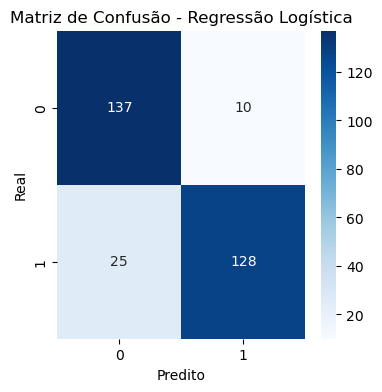

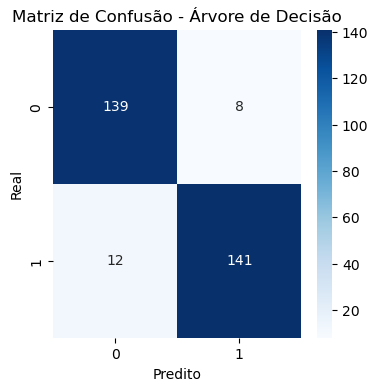

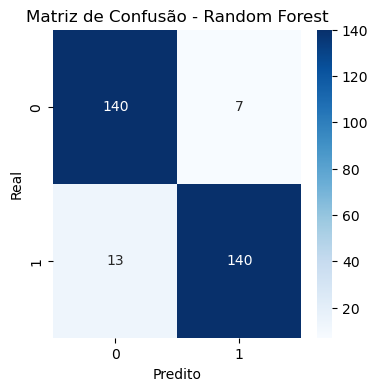

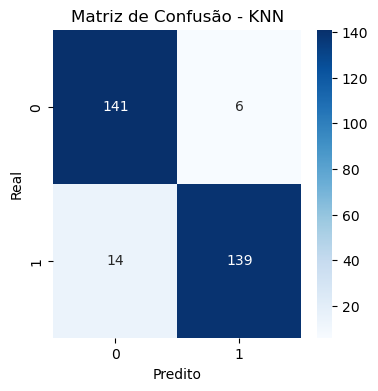

In [14]:
for nome, resultado in resultados.items():
    plt.figure(figsize=(4,4))
    sns.heatmap(resultado["Matriz de Confusão"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

## 8. Conclusão

Neste experimento, avaliamos quatro modelos clássicos de classificação: **Regressão Logística**, **Árvore de Decisão**, **Random Forest** e **KNN**. Abaixo, destacamos os principais pontos observados a partir das métricas obtidas:

- **Regressão Logística** apresentou um desempenho sólido, com acurácia de 88,3%, sendo um modelo simples e interpretável, porém com recall um pouco menor (83,7%), indicando que perdeu alguns exemplos positivos.

- **Árvore de Decisão**, **Random Forest** e **KNN** alcançaram as mesmas acurácias (93,3%), superando a regressão logística.

- Entre esses três, o **KNN** apresentou a maior precisão (95,9%), mostrando que errou menos em classificações positivas, embora tenha um recall ligeiramente menor (90,8%).

- A **Árvore de Decisão** e o **Random Forest** apresentaram métricas muito próximas, com recall ligeiramente maior na árvore (92,2%) e precisão ligeiramente maior no random forest (95,2%).

- A escolha entre esses modelos deve considerar o equilíbrio entre precisão e recall conforme o problema, bem como a complexidade computacional e interpretabilidade.

Este exercício demonstrou a importância de testar múltiplos algoritmos para entender qual modelo se adapta melhor ao conjunto de dados, e reforça a necessidade de avaliar diferentes métricas para uma análise completa do desempenho.

Para trabalhos futuros, recomenda-se explorar técnicas de otimização dos hiperparâmetros, validação cruzada e análise aprofundada do impacto dos dados desbalanceados.
